# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Read, analyze and preprocess data

In [2]:
address="D:\Machine Learning\Case study\Case study 03\Wholesale customers data.csv"
df = pd.read_csv(address)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
df.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [7]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

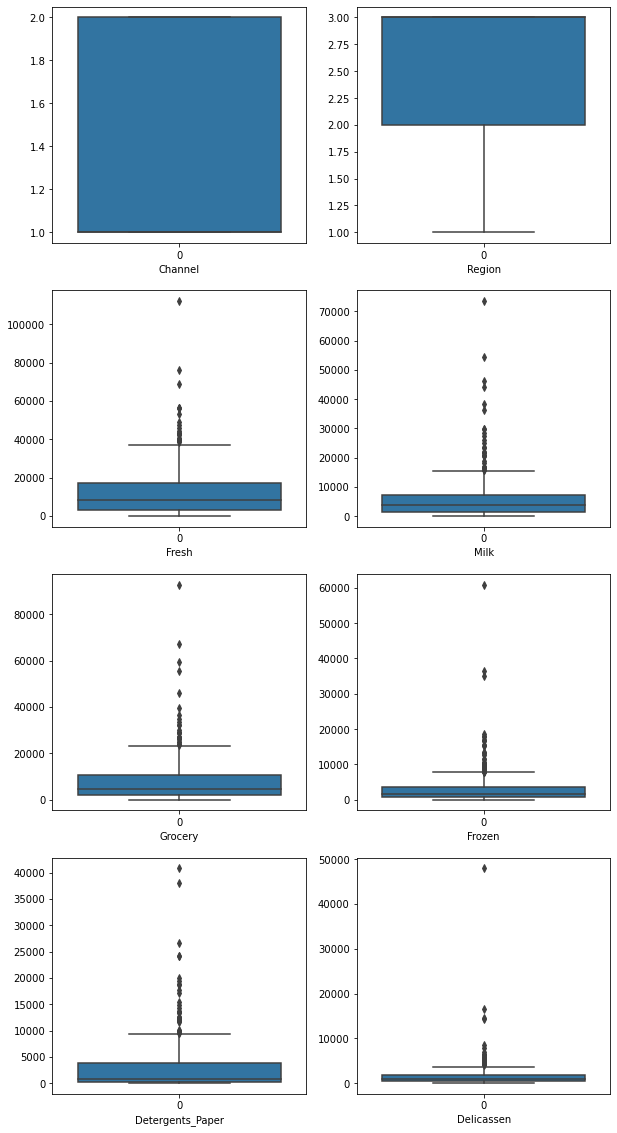

In [8]:
#check for outliers
feat_data=['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

f = plt.figure(figsize=(10,20))
for i in range(8):
    f.add_subplot(4, 2, i+1)
    sns.boxplot(data=df[feat_data[i]])
    plt.xlabel(feat_data[i])
plt.show()

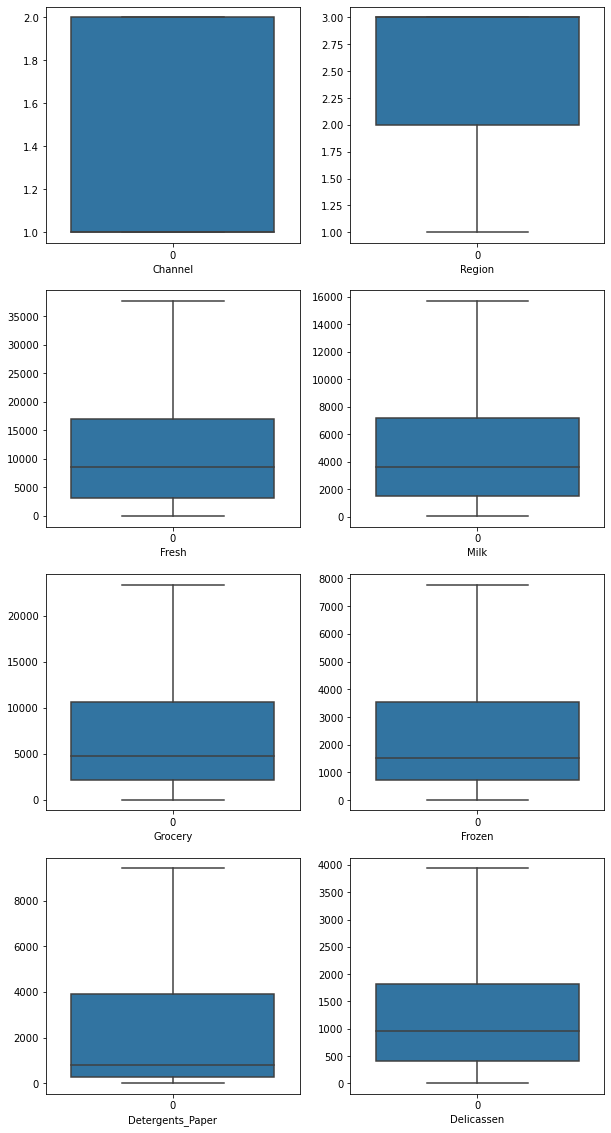

In [9]:
# remove outliers

for col in feat_data:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    min_val=q1-1.5*iqr
    max_val=q3+1.5*iqr
    
    df[col] = np.where(df[col]>max_val, max_val,df[col])
    df[col] = np.where(df[col]<min_val, min_val,df[col])
    
f = plt.figure(figsize=(10,20))
for i in range(8):
    f.add_subplot(4, 2, i+1)
    sns.boxplot(data=df[feat_data[i]])
    plt.xlabel(feat_data[i])
plt.show()    

<AxesSubplot:>

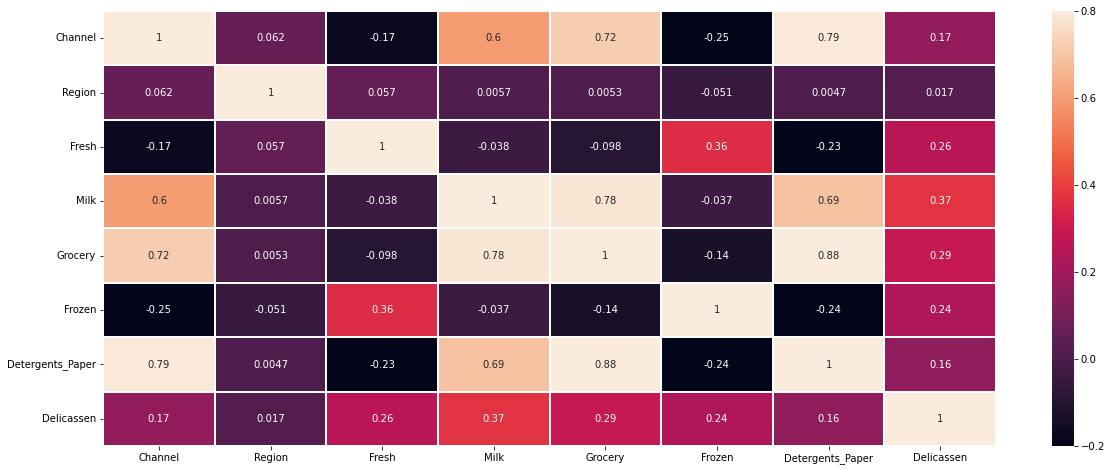

In [10]:
# Checking correlation between factors
corrmatrix = df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-.2,vmax=.8,annot=True,linewidth=.2)

In [11]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
df2 = Scaler.fit_transform(df)

In [12]:
pd.DataFrame(df2).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-1.236385e-17,6.560409e-18,-5.298792e-17,2.422305e-17,-6.207156e-17,4.592286e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-1.113200e+00,-1.139728e+00,-1.097790e+00,-1.031812e+00,-8.135002e-01,-1.168118e+00
25%,-6.902971e-01,-7.023369e-01,-8.068503e-01,-8.023920e-01,-7.714903e-01,-7.336488e-01,-7.271158e-01,-7.935246e-01
50%,-6.902971e-01,5.906683e-01,-2.797635e-01,-3.244614e-01,-3.765158e-01,-4.078410e-01,-5.365594e-01,-2.784292e-01
75%,1.448652e+00,5.906683e-01,5.466882e-01,4.888079e-01,5.189495e-01,4.353100e-01,5.206500e-01,5.116612e-01
max,1.448652e+00,5.906683e-01,2.576996e+00,2.425608e+00,2.454609e+00,2.188748e+00,2.392299e+00,2.469440e+00


# KMeans

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(df2)

KMeans()

In [14]:
pred_y = kmeans.fit_predict(df2)

C:\Users\manud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


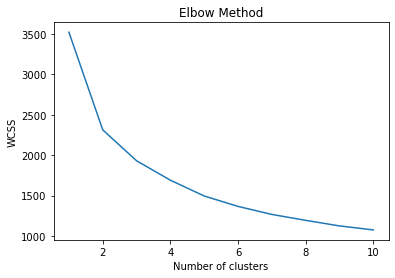

In [15]:
wcss = [] #Within Cluster Sum of Squares (WCSS)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    score = silhouette_score(df2, kmeans.labels_)
    silhouette_coefficients.append(score)

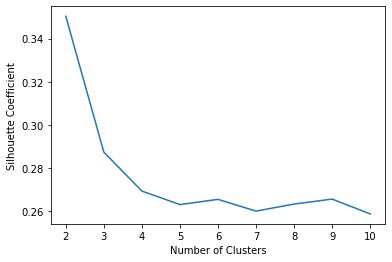

In [17]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [25]:
print('SSE: ', kmeans.inertia_)
print('\nCentroids: \n', kmeans.cluster_centers_)

SSE:  1069.2304833729956

Centroids: 
 [[-0.58334965  0.42904264  1.7101739  -0.47211437 -0.54109232  0.07752685
  -0.63449292 -0.28293538]
 [ 1.37226061  0.31359574 -0.52451475  0.32107737  0.50639884 -0.58299331
   0.84278234 -0.45407265]
 [-0.65579791 -1.74508305 -0.11468329 -0.55602739 -0.55526102 -0.03624882
  -0.53452226 -0.43406329]
 [-0.50430155 -0.53368406  1.63513109  0.55546336  0.2173993   1.78096103
  -0.4021408   1.75295609]
 [ 1.44865163  0.26741698  0.25557276  0.56950638  0.40846826 -0.39547382
   0.44072159  1.25005377]
 [ 1.39772428 -0.30212102 -0.61103319  1.5528036   1.96072658 -0.5088768
   1.96866939 -0.11147349]
 [-0.69029709  0.53894808 -0.05072663  0.09978979 -0.24344924 -0.11184334
  -0.50471541  1.48565143]
 [ 1.44865163  0.19282053  0.33360226  2.14562328  2.31998712  0.29051724
   2.10622179  2.01833801]
 [-0.63682337  0.39671751  0.10372685 -0.4689761  -0.59424503  1.94752063
  -0.6295822  -0.19137826]
 [-0.69029709  0.53242481 -0.52470416 -0.6323464  -0.

In [28]:
df['cluster'] = pred_y
print('\nCount in each cluster: \n', df['cluster'].value_counts())


Count in each cluster: 
 0    302
1    138
Name: cluster, dtype: int64


# Agglomerative clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering
ac2 = AgglomerativeClustering()
ac2.fit(df2)

AgglomerativeClustering()

In [19]:
pred_y = ac2.fit_predict(df2)

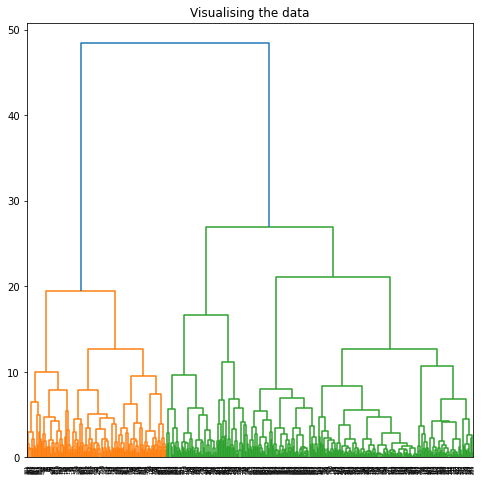

In [20]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df2, method ='ward')))

In [21]:
# A list holds the silhouette coefficients for each k
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for i in range(2, 11):
    Agg = AgglomerativeClustering(n_clusters = i)
    Agg.fit(df2)
    score = silhouette_score(df2, Agg.labels_)
    silhouette_coefficients.append(score)

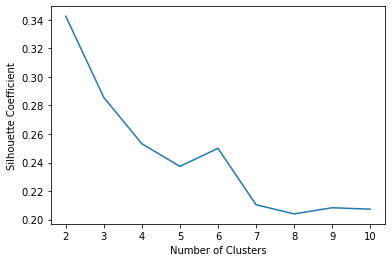

In [22]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [29]:
df['cluster'] = pred_y
print('\nCount in each cluster: \n', df['cluster'].value_counts())


Count in each cluster: 
 0    302
1    138
Name: cluster, dtype: int64
